In [1]:
from Precode2 import *
import numpy
%matplotlib inline
import matplotlib.pyplot as plt

data = np.load('AllSamples.npy')

In [2]:
k1,i_point1,k2,i_point2 = initial_S2('6766') # please replace 0111 with your last four digit of your ID

Strategy 2: k and initial points


In [3]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

4
[3.57542555 5.47748903]
6
[1.72614408 6.81819407]


In [4]:
def kmeans_pp(initial,k):
    lis=[]
    # append initial point
    centroids = [initial]
    # distances between each sample in data and the centroids
    d = np.zeros([len(data), k-1])
    # calculate the Euclidean distance between each sample
    for i in range(k-1):
        # compute the mean distance 
        d[:,i] = np.linalg.norm(centroids[i]-data, axis = 1)
        dis = np.mean(d[:,:i+1], axis=1)
        # maximum mean distance
        idx = np.argmax(dis)
        # Check if the idx is already in list
        for j in range(0,len(lis)):
            if idx in lis:
                dis[idx]=-1
                idx=np.argmax(dis)
        lis.append(idx)
        centroids.append(data[idx])
    return np.reshape(centroids,(k,2))

In [5]:
def kmeans(initial, k):
    # initialize centroids
    centroids = initial
    # initialize the loss and loss difference
    loss = diff = np.inf
    # loop until value of loss diff is very small
    while diff > 0.0001:
        # compute the distances between each data point and each centroid
        d = np.array([np.sqrt(np.sum((data - i) ** 2, axis=1)) for i in centroids])
        # find the closest centroid
        closest = np.argmin(d, axis=0)
        # compute the new centroids by taking the mean
        new = np.array([data[closest == i].mean(axis=0) for i in range(k)])
        # compute the difference 
        diff = np.abs(np.sum(centroids - new))
        # update the centroids 
        centroids = new
        # update the new loss by summing the squared distances
        loss = np.sum([np.sum((data[closest == i] - c) ** 2) for i, c in enumerate(centroids)])
    return centroids, loss

In [9]:
def graph(centroids, k, c):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    closest = np.array([np.sqrt(np.sum((data - i) ** 2, axis=1)) for i in centroids])
    closest = np.argmin(closest, axis=0)
    fig = plt.figure(figsize=(7, 5))
    # Plot the data points
    for i in range(k):
        x = [d[0] for d, c in zip(data, closest) if c == i]
        y = [d[1] for d, c in zip(data, closest) if c == i]
        if c == "final":
            plt.scatter(x, y, s = 30, c = colors[i % len(colors)], label = 'Cluster ' + str(i))
            plt.title("Final Centroids")
        else:
            plt.scatter(x, y, s = 30, c = "y")
            plt.title("Initial Centroids")
    # Plot the centroids
    for i in range(k):
        x = centroids[i][0]
        y = centroids[i][1]
        plt.scatter(x, y, s = 100, c = 'black', marker = 'x', label = 'Centroid ' + str(i))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [10]:
def compute(k, point):
    initial = kmeans_pp(point,k)
    print("The initial centroids:\n",initial)
    graph(initial, k, "x")
    centroids,loss = kmeans(initial, k)
    print("The final centroids:\n",centroids)
    print("The loss:",loss)
    graph(centroids, k, "final")

The initial centroids:
 [[ 3.57542555  5.47748903]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 2.95297924  9.65073899]]


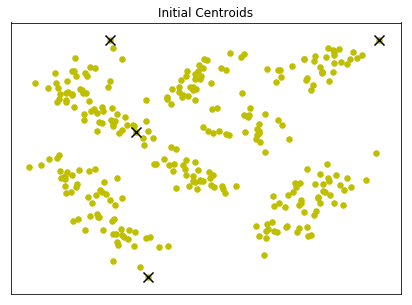

The final centroids:
 [[3.33995748 2.59215224]
 [6.60345839 7.57042104]
 [7.38076264 2.33245532]
 [2.85859235 6.93136525]]
The loss: 788.269349006556


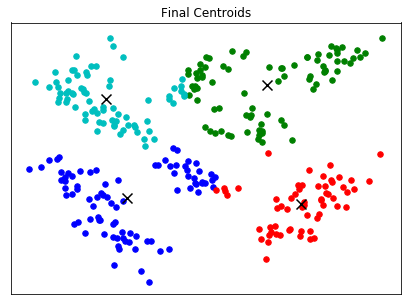

In [11]:
compute(k1, i_point1)

The initial centroids:
 [[ 1.72614408  6.81819407]
 [ 7.68097556  0.83542043]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 2.95297924  9.65073899]
 [ 3.04101702 -0.36138487]]


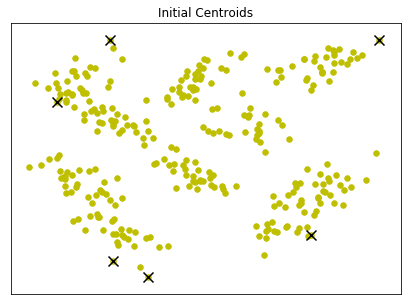

The final centroids:
 [[2.56333815 6.9782248 ]
 [7.41419243 2.32169114]
 [7.75648325 8.55668928]
 [3.14506148 0.90770655]
 [5.46427736 6.83771354]
 [3.49556658 3.56611232]]
The loss: 476.118751676353


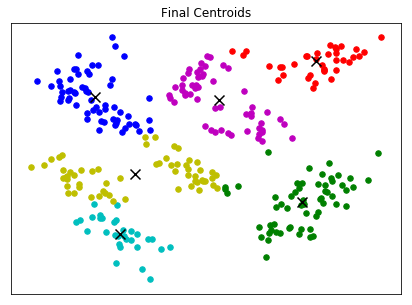

In [12]:
compute(k2, i_point2)